In [1]:
import numpy as np
from arviz import *
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(10)
from pymc3 import *
from sklearn.preprocessing import MinMaxScaler

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [15]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
true_regression_line = true_intercept + true_slope * x
regression_line = true_regression_line  + np.random.normal(scale=.2, size=size)

data = dict(x=x, y=regression_line)

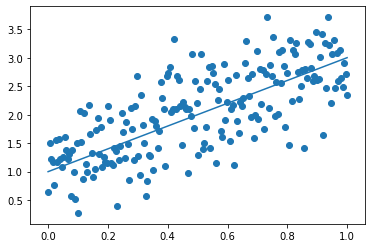

In [16]:
plt.figure()
plt.scatter(x,regression_line)
plt.plot(x,true_regression_line)
plt.show()

In [17]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.GLM.from_formula('y ~ x', data)
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:06<00:00, 1010.71draws/s]


/home/rmlans/anaconda3/envs/deephyper_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

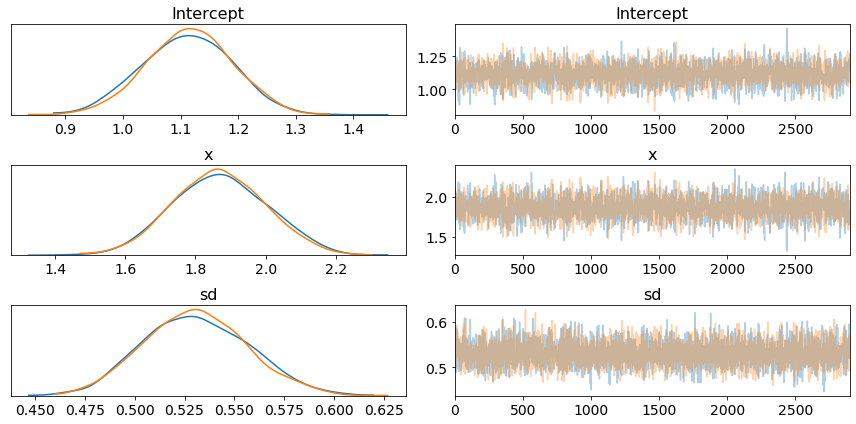

In [18]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();